<a href="https://colab.research.google.com/github/jeong1suk/Capstone_ElectricCar/blob/beoman/crop%EC%A0%84%EA%B8%B0%EC%B0%A8%EA%B5%AC%EB%B6%84_exp%EC%95%88%EB%8A%98%EC%96%B4%EB%82%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -L "https://app.roboflow.com/ds/b0OtQarAVy?key=ezOc4rp4CY" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    214      0  0:00:04  0:00:04 --:--:--   214
100 5145k  100 5145k    0     0  1048k      0  0:00:04  0:00:04 --:--:-- 23.9M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/---2_jpg.rf.d453b4dbfbc9b30b680da4030c22c4b6.jpg  
 extracting: test/images/---3_jpg.rf.0bcb3b845292f37813ae637b75e5998c.jpg  
 extracting: test/images/---_jpg.rf.b6132c58b83f5b48934b30416242a887.jpg  
 extracting: test/images/01-0787_jpg.rf.1c3d6ba464b83669fe5cc95fc7bb756c.jpg  
 extracting: test/images/01-1168_jpg.rf.30aef4b170f3800f33d925dbed4125d9.jpg  
 extracting: test/images/01-1206-2_jpg.rf.7ca3bb48a46c79829d0a81fa529312d0.jpg  
 extracting: test/images/01-1926-3_j

In [2]:
!nvidia-smi

Tue Oct 25 10:07:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%cat /content/dataset/data.yaml

cat: /content/dataset/data.yaml: No such file or directory


In [4]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 14411, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14411 (delta 12), reused 22 (delta 10), pack-reused 14379
Receiving objects: 100% (14411/14411), 13.31 MiB | 7.93 MiB/s, done.
Resolving deltas: 100% (9963/9963), done.


In [5]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.8 MB/s 


In [7]:
# 데이터셋 위치 수정
#파일의 위치, 클래스명 알려주는 설정파일이라 경로 수정
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
  data = yaml.load(f, Loader=yaml.Loader)

print(data)

data['train'] = '/content/dataset/train/images/'
data['test'] = '/content/dataset/test/images/'
data['val'] = '/content/dataset/valid/images/'

with open('/content/dataset/data.yaml', 'w') as f:
  yaml.dump(data, f)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'nc': 1, 'names': ['number-plate']}
{'train': '/content/dataset/train/images/', 'val': '/content/dataset/valid/images/', 'nc': 1, 'names': ['number-plate'], 'test': '/content/dataset/test/images/'}


In [8]:
%cd /content/yolov5/

# 욜로v5_m로 학습 
!python train.py --img 416 --batch 16 --epochs 101 --data /content/dataset/data.yaml --cfg ./models/yolov5m.yaml --weights yolov5m.pt --name number_yolov5m_results

/content/yolov5
train: weights=yolov5m.pt, cfg=./models/yolov5m.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=101, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=number_yolov5m_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, io

In [ ]:
# test 이미지 확인
%cd /content/yolov5/

from glob import glob 

img_list = glob('/content/dataset/test/images/*.jpg') #glob 함수는 사용자가 제시한 조건에 맞는 파일명을 리스트 형식으로 반환

for i in range(len(img_list)):
  print((img_list[i]))


/content/yolov5
/content/dataset/test/images/01-1206-2_jpg.rf.7ca3bb48a46c79829d0a81fa529312d0.jpg
/content/dataset/test/images/01-7110_jpg.rf.576ec9e700e8f057d1f92fb996b58ee9.jpg
/content/dataset/test/images/---2_jpg.rf.d453b4dbfbc9b30b680da4030c22c4b6.jpg
/content/dataset/test/images/01-1168_jpg.rf.30aef4b170f3800f33d925dbed4125d9.jpg
/content/dataset/test/images/01-0787_jpg.rf.1c3d6ba464b83669fe5cc95fc7bb756c.jpg
/content/dataset/test/images/01-3774_jpg.rf.46a02cd1f8a3cd3778a3f07f40dc3a9e.jpg
/content/dataset/test/images/01-7110-5_jpg.rf.8b5b9967cbe94f1a6090b0d31fb7f501.jpg
/content/dataset/test/images/01-5295-2_jpg.rf.fcd0fb05606ee07acf02bf22c6565e8b.jpg
/content/dataset/test/images/---3_jpg.rf.0bcb3b845292f37813ae637b75e5998c.jpg
/content/dataset/test/images/01-2223_jpg.rf.f73c8d4d6d770d05b9701e13ac394f88.jpg
/content/dataset/test/images/01-7330-2_jpg.rf.286bfd98181385cd3e37dc90d17aabf8.jpg
/content/dataset/test/images/01-9251_jpg.rf.3fe1ee3d5ea18156924e39161c3b2406.jpg
/content/d

/content


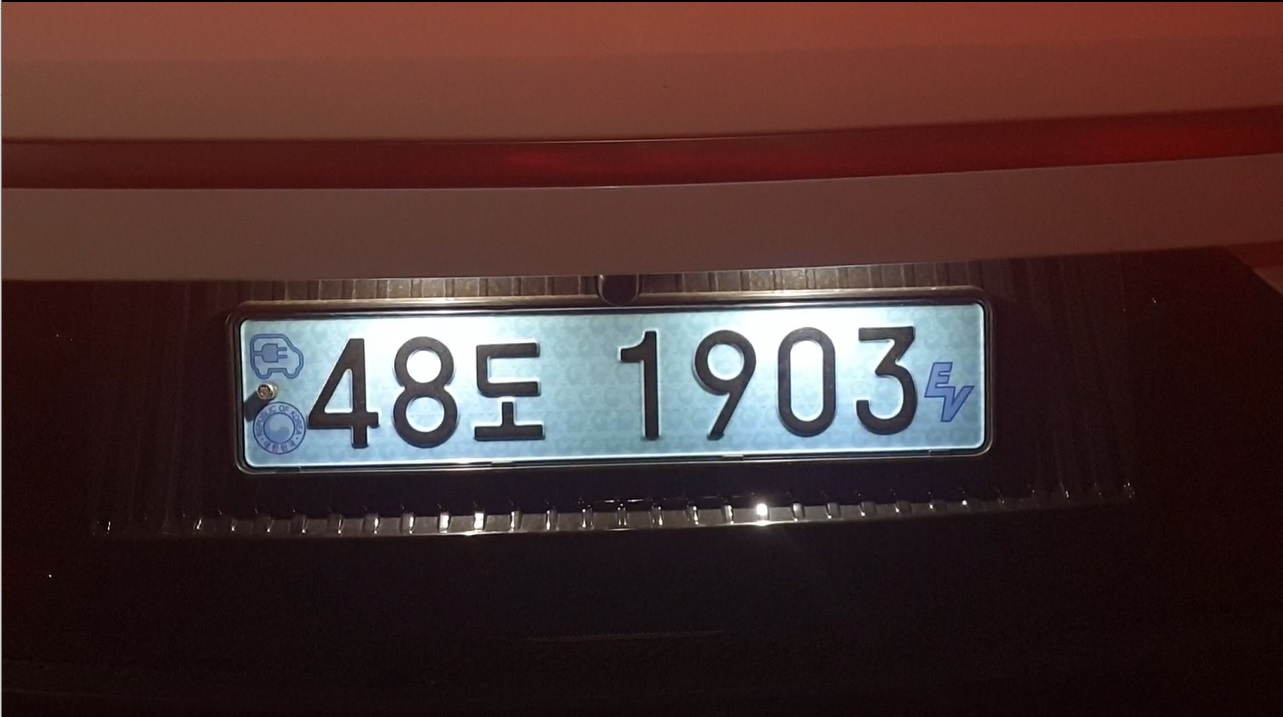

/content/yolov5
detect: weights=['/content/yolov5/runs/train/number_yolov5m_results/weights/best.pt'], source=/content/r빛있는전기차.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=ele, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-206-gfba61e5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5m summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/1 /content/r빛있는전기차.jpg: 416x416 1 number-plate, 18.3ms
Speed: 0.4ms pre-process, 18.3ms inference, 1.6ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/ele
1 labels saved to runs/detect/ele/labels


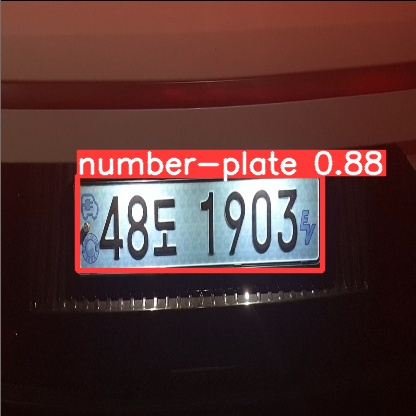

In [37]:
from IPython.display import Image
import os
%cd /content/
import cv2
from google.colab.patches import cv2_imshow
import shutil

img = cv2.imread('빛있는전기차.jpg')
cv2_imshow(img)
#img = img[563:605,535:754]
reimg = cv2.resize(img, dsize = (416,416))

cv2.imwrite("r빛있는전기차.jpg", reimg)
%cd /content/yolov5/




val_img_path = '/content/r빛있는전기차.jpg'

weights_path = '/content/yolov5/runs/train/number_yolov5m_results/weights/best.pt'


!python detect.py --weights "{weights_path}" --img 416 --conf 0.5 --source "{val_img_path}" --save-crop --save-txt --save-conf --name "ele"        #70% 이상이면 성공



detect_img_path = '/content/yolov5/runs/detect/ele'            # 확인 할려면 exp_num num을 계속 올려줘야함 
Image(os.path.join(detect_img_path, os.path.basename(val_img_path)))

In [ ]:
from glob import glob 
src = glob('/content/yolov5/runs/detect/exp16/crops/number-plate/*.jpg')
print(src)

['/content/yolov5/runs/detect/exp16/crops/number-plate/r밤충전소옆.jpg']


/content/yolov5/runs/detect/ele/crops/number-plate


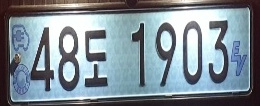

In [38]:
import cv2
from google.colab.patches import cv2_imshow
%cd /content/yolov5/runs/detect/ele/crops/number-plate/

crops_img = cv2.imread('r빛있는전기차.jpg')
cv2_imshow(crops_img)



/content


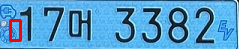

<class 'numpy.ndarray'>
(49, 239, 3)
(49, 239)


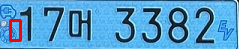

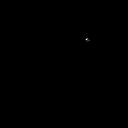

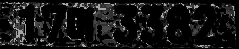

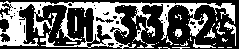

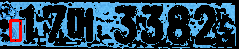

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%cd /content/


src = cv2.imread('연습2.jpg')

src = src[528: 577,476:715]
#print(src.shape)

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
crop = src_ycrcb[20: 40, 10: 20]
img = src
img = cv2.rectangle(img, (20,40), (10,20), (0,0,255), 2)
cv2_imshow(img)

channels = [1, 2]

cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
hist = cv2.calcHist([crop], channels, None, histSize, ranges)
hist_norm = cv2.normalize(hist, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 3)
dst = cv2.copyTo(src, backproj)

ret, dst123 = cv2.threshold(backproj, 0, 255, cv2.THRESH_BINARY)

print(type(dst123))
print(src.shape)
print(backproj.shape)

cv2_imshow(src)
cv2_imshow(hist_norm)
cv2_imshow(backproj)
cv2_imshow(dst123)
cv2_imshow(dst)

/content
(39, 117, 3)


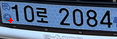

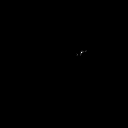

(39, 117, 3)
(39, 117)


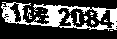

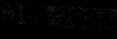

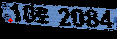

(39, 117, 3)


In [27]:
%cd '/content'
src2 = cv2.imread('전기차2.jpg')
src2 = src2[309:348, 222: 339]

src2_ycrcb = cv2.cvtColor(src2, cv2.COLOR_BGR2YCrCb)
print(src2_ycrcb.shape)
crop2 = src2_ycrcb[10: 20, 110: 117]

img = src2
img = cv2.rectangle(img, (10,20), (10,20), (0,0,255), 3)
cv2_imshow(img)

channels = [1, 2]

cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
hist2 = cv2.calcHist([crop2], channels, None, histSize, ranges)
hist2_norm = cv2.normalize(hist2, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2_imshow(hist2_norm)

backproj2 = cv2.calcBackProject([src2_ycrcb], channels, hist2, ranges, 1)

print(src2.shape)
print(backproj2.shape)
#re = cv2.resize(src2, dsize = (backproj.shape[1],backproj.shape[0]))
#print(re.shape)

ret, dst1234 = cv2.threshold(backproj2, 0, 255, cv2.THRESH_BINARY)

cv2_imshow(dst1234)
dst2 = cv2.copyTo(src2, backproj2)

cv2_imshow(backproj2)
cv2_imshow(dst2)
print(dst2.shape)

/content


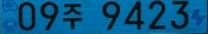

(34, 208, 3)


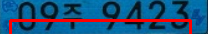

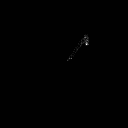

(34, 208, 3)
(34, 208)


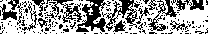

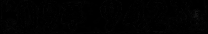

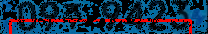

(34, 208, 3)


In [28]:
%cd '/content'
src3 = cv2.imread('전기차.jpg')
src3 = src3[594:628, 503: 711]

cv2_imshow(src3)

src3_ycrcb = cv2.cvtColor(src3, cv2.COLOR_BGR2YCrCb)
print(src3_ycrcb.shape)
crop3 = src3_ycrcb[10: 20, 180: 207]

img = src3
img = cv2.rectangle(img, (190,207), (10,20), (0,0,255), 2)
cv2_imshow(img)

channels = [1, 2]

cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
hist3 = cv2.calcHist([crop3], channels, None, histSize, ranges)
hist3_norm = cv2.normalize(hist3, None, 1, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2_imshow(hist3_norm)

backproj3 = cv2.calcBackProject([src3_ycrcb], channels, hist3, ranges, 1)

print(src3.shape)
print(backproj3.shape)
#re = cv2.resize(src3, dsize = (backproj.shape[1],backproj.shape[0]))
#print(re.shape)

ret, dst123456 = cv2.threshold(backproj3, 0, 255, cv2.THRESH_BINARY)

cv2_imshow(dst123456)
dst2 = cv2.copyTo(src3, backproj3)

cv2_imshow(backproj3)
cv2_imshow(dst2)
print(dst2.shape)

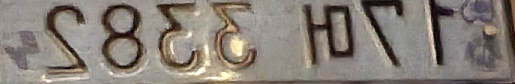

(84, 515, 3)


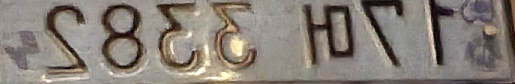

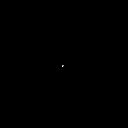

(84, 515, 3)
(84, 515)


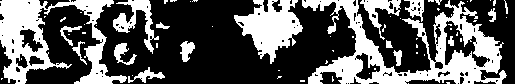

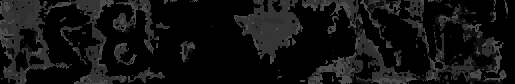

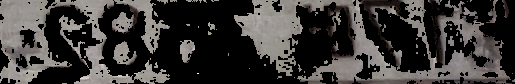

In [29]:
src6 = cv2.imread('저녁전등.jpg')
src6 = src6[458:542,522:1037]

cv2_imshow(src6)

src6_ycrcb = cv2.cvtColor(src6, cv2.COLOR_BGR2YCrCb)
print(src6_ycrcb.shape)

crop6 = src6_ycrcb[30: 40, 0: 20]

img = src6
#img = cv2.rectangle(img, (10,50), (10,20), (0,0,255), 2)
cv2_imshow(img)

channels = [1, 2]

cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
hist6 = cv2.calcHist([crop6], channels, None, histSize, ranges)
hist6_norm = cv2.normalize(hist6, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2_imshow(hist6_norm)

backproj6 = cv2.calcBackProject([src6_ycrcb], channels, hist6, ranges, 1)

print(src6.shape)
print(backproj6.shape)
#re = cv2.resize(src6, dsize = (backproj.shape[1],backproj.shape[0]))
#print(re.shape)

ret, dst6 = cv2.threshold(backproj6, 1, 255, cv2.THRESH_BINARY)

cv2_imshow(dst6)
dst6 = cv2.copyTo(src6, backproj6)

cv2_imshow(backproj6)
cv2_imshow(dst6)

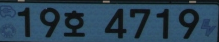

(42, 219, 3)


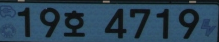

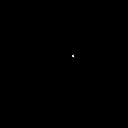

(42, 219, 3)
(42, 219)


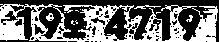

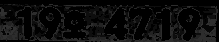

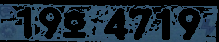

In [30]:
src7 = cv2.imread('전기차3.jpg')
src7 = src7[563:605,535:754]

cv2_imshow(src7)

src7_ycrcb = cv2.cvtColor(src7, cv2.COLOR_BGR2YCrCb)
print(src7_ycrcb.shape)

crop7 = src7_ycrcb[30: 40, 0: 20]

img = src7
#img = cv2.rectangle(img, (10,50), (10,20), (0,0,255), 2)
cv2_imshow(img)

channels = [1, 2]

cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
hist7 = cv2.calcHist([crop7], channels, None, histSize, ranges)
hist7_norm = cv2.normalize(hist7, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2_imshow(hist7_norm)

backproj7 = cv2.calcBackProject([src7_ycrcb], channels, hist7, ranges, 1)

print(src7.shape)
print(backproj7.shape)
#re = cv2.resize(src7, dsize = (backproj.shape[1],backproj.shape[0]))
#print(re.shape)

ret, dst6 = cv2.threshold(backproj7, 1, 255, cv2.THRESH_BINARY)

cv2_imshow(dst6)
dst6 = cv2.copyTo(src7, backproj7)

cv2_imshow(backproj7)
cv2_imshow(dst6)

/content


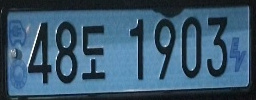

(100, 256, 3)


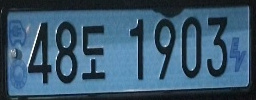

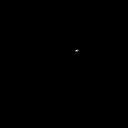

(100, 256, 3)
(100, 256)


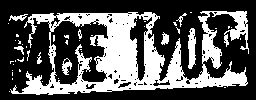

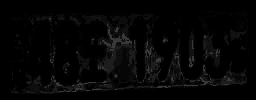

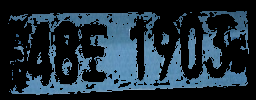

In [31]:
%cd '/content'
src8 = cv2.imread('그냥전기차crop.jpg')
#src8 = src8[563:605,535:754]

cv2_imshow(src8)

src8_ycrcb = cv2.cvtColor(src8, cv2.COLOR_BGR2YCrCb)
print(src8_ycrcb.shape)

crop8 = src8_ycrcb[30: 50, 120: 130]

img = src8
#img = cv2.rectangle(img, (10,50), (10,20), (0,0,255), 2)
cv2_imshow(img)

channels = [1, 2]

cr_bins = 128
cb_bins = 128
histSize = [cr_bins, cb_bins]

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
hist8 = cv2.calcHist([crop8], channels, None, histSize, ranges)
hist8_norm = cv2.normalize(hist8, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2_imshow(hist8_norm)

backproj8 = cv2.calcBackProject([src8_ycrcb], channels, hist8, ranges, 1)

print(src8.shape)
print(backproj8.shape)
#re = cv2.resize(src8, dsize = (backproj.shape[1],backproj.shape[0]))
#print(re.shape)

ret, dst7 = cv2.threshold(backproj8, 1, 255, cv2.THRESH_BINARY)

cv2_imshow(dst7)
dst7 = cv2.copyTo(src8, backproj8)

cv2_imshow(backproj8)
cv2_imshow(dst7)

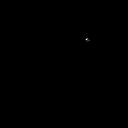

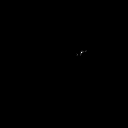

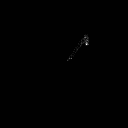

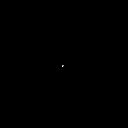

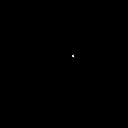

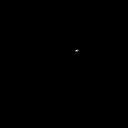

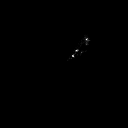

In [32]:
import numpy as np
n_hist = hist + hist2 + hist3 + hist7 + hist8

cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range
n_hist_norm = cv2.normalize(n_hist, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


cv2_imshow(hist_norm)
cv2_imshow(hist2_norm)
cv2_imshow(hist3_norm)
cv2_imshow(hist6_norm)
cv2_imshow(hist7_norm)
cv2_imshow(hist8_norm)
cv2_imshow(n_hist_norm)

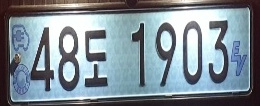

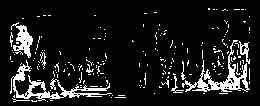

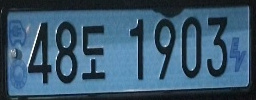

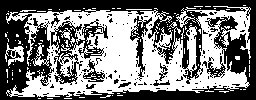

In [42]:
crops_img_ycrcb = cv2.cvtColor(crops_img, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

backproj5 = cv2.calcBackProject([crops_img_ycrcb], channels, n_hist, ranges, 1)
#dst4 = cv2.copyTo(crops_img, backproj5)
ret, dst123456 = cv2.threshold(backproj5, 1,255, cv2.THRESH_BINARY)
cv2_imshow(crops_img)
cv2_imshow(dst123456)
#cv2_imshow(dst4)


crops_img2_ycrcb = cv2.cvtColor(src8, cv2.COLOR_BGR2YCrCb)

channels = [1, 2]
cr_range = [0, 256]
cb_range = [0, 256]
ranges = cr_range + cb_range

backproj10 = cv2.calcBackProject([crops_img2_ycrcb], channels, n_hist, ranges, 1)
#dst4 = cv2.copyTo(crops_img, backproj5)
ret, dst1234567 = cv2.threshold(backproj10, 1,255, cv2.THRESH_BINARY)


cv2_imshow(src8)
cv2_imshow(dst1234567)


(100, 256)


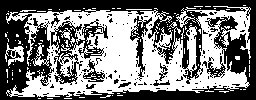

12503 13097
전기 자동차


In [36]:
print(dst123456.shape)
h,w= dst123456.shape
isElectronic = 0 
notElectronic = 0

#gray = cv2.cvtColor(dst123456, cv2.COLOR_BGR2GRAY)
ret, dst123456 = cv2.threshold(dst123456, 2, 255, cv2.THRESH_BINARY)

cv2_imshow(dst123456)

for y in range(h):
    for x in range(w):
        if dst123456[y, x] >= 1: # 픽셀 값이 1 이상이면 전기차로 가정
            isElectronic += 1
        else:
            notElectronic += 1
                                  
print(isElectronic, notElectronic)
            
if 10 * isElectronic >= notElectronic: # 10배(하이퍼 파라미터) 이상 차이가 나면 전기자동차로 인식
    print("전기 자동차")

else:
    print("전기 자동차 아님")

In [28]:
!zip -r /content/detect.zip /content/yolov5/runs/detect


  adding: content/yolov5/runs/detect/ (stored 0%)
  adding: content/yolov5/runs/detect/exp4/ (stored 0%)
  adding: content/yolov5/runs/detect/exp4/crops/ (stored 0%)
  adding: content/yolov5/runs/detect/exp4/crops/number-plate/ (stored 0%)
  adding: content/yolov5/runs/detect/exp4/crops/number-plate/r그냥전기차.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp4/labels/ (stored 0%)
  adding: content/yolov5/runs/detect/exp4/labels/r그냥전기차.txt (deflated 11%)
  adding: content/yolov5/runs/detect/exp4/r그냥전기차.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp3/ (stored 0%)
  adding: content/yolov5/runs/detect/exp3/crops/ (stored 0%)
  adding: content/yolov5/runs/detect/exp3/crops/number-plate/ (stored 0%)
  adding: content/yolov5/runs/detect/exp3/crops/number-plate/r빛있는전기차.jpg (deflated 1%)
  adding: content/yolov5/runs/detect/exp3/labels/ (stored 0%)
  adding: content/yolov5/runs/detect/exp3/labels/r빛있는전기차.txt (deflated 11%)
  adding: content/yolov5/runs/detect/exp3/r빛있는전기차.jpg (